In [1]:
import pandas as pd
import numpy as np 
#### 
from sklearn.model_selection import train_test_split , StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
#df = pd.read_csv('./2K_1420_part_1234567features.csv',delimiter=';',index_col=False) 




df = pd.read_csv('/Users/pooyan/Documents/Emerson/data/data.csv', index_col=False, sep=";", header=0)
#set 0 as normal as 1 as abnormal
df.insert(3, 'target', 0)

# df.drop('Rows Header(1)')
df

,Rows Header(1),Rows Header,TimeStamp,target,RU.LNG.214PZA451A.PV,RU.LNG.214TRA476A.PV,RU.LNG.214ERA151.PV,RU.LNG.214LRSA450.PV,RU.LNG.214PDRA425.PV,RU.LNG.214PRA431.PV,...,RU.LNG.214PRA221.PV,RU.LNG.214PDRA436.PV,RU.LNG.214SZA458.PV,RU.LNG.214PRA221A.PV,RU.LNG.214PRA221B.PV,RU.LNG.214PRA221C.PV,RU.LNG.214TR210.PV,RU.LNG.214PRA218A.PV,RU.LNG.214PRA218B.PV,RU.LNG.214PRA218C.PV
0,0,4/30/2018 2:00:00 PM,4/30/2018 2:00:00 PM,0,1.735779,46.850682,344.721100,58.360908,0.067238,0.022461,...,18.452732,0.018201,3596.894900,18.42876,18.42876,18.44123,-51.697580,2.713089,2.743305,2.701507
1,1,4/30/2018 2:05:00 PM,4/30/2018 2:05:00 PM,0,1.735758,46.846702,344.478560,58.263972,0.066998,0.022461,...,18.508827,0.018237,3596.965600,18.49226,18.49226,18.52101,-51.431550,2.711315,2.742480,2.699879
2,2,4/30/2018 2:10:00 PM,4/30/2018 2:10:00 PM,0,1.735737,46.842724,345.997310,58.238913,0.066856,0.022461,...,18.445155,0.018494,3597.036500,18.48804,18.49053,18.46196,-51.145730,2.709541,2.741655,2.698252
3,3,4/30/2018 2:15:00 PM,4/30/2018 2:15:00 PM,0,1.735716,46.838745,349.088120,58.204752,0.066744,0.022461,...,18.368262,0.018994,3597.107400,18.39274,18.40107,18.40290,-50.859920,2.685702,2.729231,2.680689
4,4,4/30/2018 2:20:00 PM,4/30/2018 2:20:00 PM,0,1.735695,46.834766,349.821580,58.251884,0.066828,0.022461,...,18.250585,0.019495,3597.178100,18.34807,18.34919,18.34385,-50.574100,2.648563,2.692863,2.630229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70556,70556,12/31/2018 1:40:00 PM,12/31/2018 1:40:00 PM,0,0.001812,26.244280,5.663667,66.835000,-0.000133,0.000610,...,0.000000,0.000002,-0.001465,0.00000,0.00000,0.00000,-7.652736,-0.124050,-0.124050,-0.126979
70557,70557,12/31/2018 1:45:00 PM,12/31/2018 1:45:00 PM,0,0.001812,26.224598,5.661115,66.839119,-0.000132,0.000610,...,0.000000,0.000003,-0.001465,0.00000,0.00000,0.00000,-7.653512,-0.124050,-0.124050,-0.126979
70558,70558,12/31/2018 1:50:00 PM,12/31/2018 1:50:00 PM,0,0.001812,26.204914,5.658563,66.843239,-0.000131,0.000610,...,0.000000,0.000003,-0.001465,0.00000,0.00000,0.00000,-7.654287,-0.124050,-0.124050,-0.126979
70559,70559,12/31/2018 1:55:00 PM,12/31/2018 1:55:00 PM,0,0.001811,26.185231,5.656011,66.847366,-0.000129,0.000610,...,0.000000,0.000004,-0.001465,0.00000,0.00000,0.00000,-7.655064,-0.124050,-0.124050,-0.126979


In [3]:

  
index1 = []
index2 = []
index3 = [] 
df['target']= 0

#condition 1
index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218C.PV'] < df['RU.LNG.214PRA218C.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TRA476A.PV'] < df['RU.LNG.214TRA476A.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PZA451A.PV'] < df['RU.LNG.214PZA451A.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PDRA425.PV'] < df['RU.LNG.214PDRA425.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA431.PV'] > df['RU.LNG.214PRA431.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA434.PV'] > df['RU.LNG.214PRA434.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218.PV'] < df['RU.LNG.214PRA218.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PDRA436.PV'] < df['RU.LNG.214PDRA436.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA221B.PV'] < df['RU.LNG.214PRA221B.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TR210.PV'] > df['RU.LNG.214TR210.PV'].quantile(0.99)].index |\
df[df['RU.LNG.214PRA218A.PV'] < df['RU.LNG.214PRA218A.PV'].quantile(0.01)].index
    
#condition 2    
    
#lube oil level    low
index2 = df[df['RU.LNG.214LRSA450.PV'] <= 55].index | \
df[df['RU.LNG.214LRSA450.PV'] <= 45].index 


#condition 3
#lube oil pressure

index3 = df[df['RU.LNG.214PZA451A.PV'] <= 1.7704].index & \
df[df['RU.LNG.214PZA451A.PV'] >= 1.7672].index 

#defining labels
df.loc[index1, 'target'] = 1  
df.loc[index2, 'target'] = 2  
df.loc[index3, 'target'] = 3      
 
print("normal samples: ",len(df[df['target']==0]), "class1 samples: ",len(df[df['target']==1]) )    
print("class 2: ",len(df[df['target']==2]), "class3 samples: ",len(df[df['target']==3]) )   
 

normal samples:  43509 class1 samples:  3018
class 2:  23 class3 samples:  24011


<ipython-input-3-65cff2cdac98>:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
<ipython-input-3-65cff2cdac98>:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
<ipython-input-3-65cff2cdac98>:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
<ipython-input-3-65cff2cdac98>:7: FutureWarning: Index.__or__ operating as a set operation 

In [5]:


X = df.loc[:,'RU.LNG.214PZA451A.PV':].to_numpy() # all measurement columns
y = df['target'].to_numpy() # labels 



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:

# example of gaussian naive bayes
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB



# fit model no training data
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [8]:

# make predictions for test data
y_pred = model.predict(X_test)


In [9]:
predictions = [round(value) for value in y_pred]
# evaluate predictions

In [10]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 38.41%


In [11]:
from sklearn.metrics import confusion_matrix


print(confusion_matrix(y_test, y_pred))

[[ 203  118    2 8368]
 [   7  467    0  111]
 [   0    0    0    4]
 [  41   40    1 4751]]


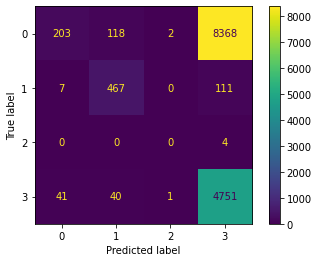

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [13]:
 from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: Negative values in data passed to MultinomialNB (input X)

In [17]:
 from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.54%


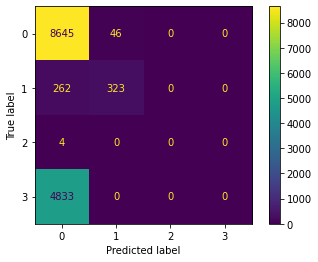

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [19]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: Negative values in data passed to CategoricalNB (input X)

In [22]:



from sklearn.preprocessing import MinMaxScale

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y)
#X_ = scaler.transform(X_test)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

ImportError: cannot import name 'MinMaxScale' from 'sklearn.preprocessing' (/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/__init__.py)

In [23]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [24]:
X_norm = min_max_scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20)

In [29]:
 from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.45%


In [31]:
from sklearn.metrics import confusion_matrix


print(confusion_matrix(y_test, y_pred))

[[8814    0    0    0]
 [ 610    0    0    0]
 [   4    0    0    0]
 [4685    0    0    0]]


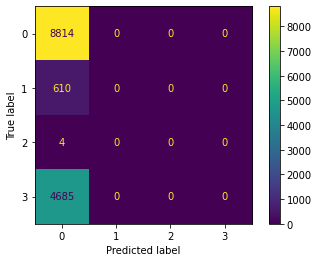

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show()